In [3]:
# import packages for analysis and modeling
import pandas as pd  # data frame operations
#from pandas.tools.plotting import scatter_matrix  # scatter plot matrix
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # 2D plotting
import zipcodes
#import pyzipcode
#import time
#import folium

import os


#from pandas import Series
#from scipy.stats import uniform  # for training-and-test split
#from scipy.stats import boxcox
#from sklearn.tree import DecisionTreeRegressor  # machine learning tree
#from sklearn.ensemble import RandomForestRegressor # ensemble method
#from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from pprint import pprint
from matplotlib import pyplot
#from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.arima_model import ARIMAResults
#from math import sqrt

In [4]:
fileName = 'us_zip_analysis_complete.csv'
ar_analysis = pd.read_csv(fileName, encoding = "ISO-8859-1")
ar_analysis.head()

,State,Zip,Date,Prediction
0,IL,60657,2018-01,1024474.0
1,IL,60657,2018-02,1035049.0
2,IL,60657,2018-03,1037661.0
3,IL,60657,2018-04,1034137.0
4,IL,60657,2018-05,1038418.0


In [5]:
fileName = 'us_zip_rmse.csv'
rmse_df = pd.read_csv(fileName, encoding = "ISO-8859-1")
rmse_df.head()

,Zip,RMSE,ZIP
0,NaN,4646.897368,60657.0
1,NaN,3678.579407,60614.0
2,NaN,9657.048815,60640.0
3,NaN,2627.234974,60647.0
4,NaN,2344.196013,60618.0


In [6]:
#pd.to_numeric(s, downcast='integer')

rmse_df.ZIP  = pd.to_numeric(rmse_df.ZIP, downcast='integer')
rmse_df.head()

,Zip,RMSE,ZIP
0,NaN,4646.897368,60657
1,NaN,3678.579407,60614
2,NaN,9657.048815,60640
3,NaN,2627.234974,60647
4,NaN,2344.196013,60618


In [7]:
#lttlRck = ar_ltl_r.groupby(['City', 'variable']).mean()
#ar = ar.drop(ar.loc[:,ar.columns[6:15]], axis=1)

toGrp = ar_analysis.drop(ar_analysis.loc[:,['State','Date']], axis=1)

zipGrpMin = toGrp.groupby(['Zip']).max()
zipGrpMax = toGrp.groupby(['Zip']).min()
#print(zipGrp)

#df1.merge(df2, left_on='lkey', right_on='rkey')
zipA = zipGrpMin.merge(zipGrpMax, left_on='Zip', right_on='Zip')
zipA['Range'] = zipA.Prediction_x - zipA.Prediction_y
zipA['Percentage'] = zipA.Range / zipA.Prediction_y

zipA

# df.sort_values(by=['col1'])
t = zipA.sort_values(by=['Range'],ascending=False)
#zipA.info()
t.iloc[0:3,]

,Prediction_x,Prediction_y,Range,Percentage
Zip,,,,
81611,5648817.0,4231762.0,1417055.0,0.334862
10128,7535181.0,6370811.0,1164370.0,0.182766
81615,3366305.0,2554666.0,811639.0,0.317708


In [8]:

test_merge = zipA.merge(rmse_df, left_on='Zip', right_on='ZIP')
test_merge.head()

,Prediction_x,Prediction_y,Range,Percentage,Zip,RMSE,ZIP
0,230092.0,222586.0,7506.0,0.033722,NaN,637.249448,1001
1,371271.0,345465.0,25806.0,0.074699,NaN,1247.290352,1002
2,236910.0,214771.0,22139.0,0.103082,NaN,897.166588,1005
3,283047.0,269644.0,13403.0,0.049706,NaN,597.656372,1007
4,233498.0,203045.0,30453.0,0.149982,NaN,2550.472631,1008


In [13]:
# df.sort_values(by=['col1'])
t = test_merge.sort_values(by=['RMSE', 'Percentage' ],ascending=True)
#zipA.info()
t.iloc[0:100,]

,Prediction_x,Prediction_y,Range,Percentage,Zip,RMSE,ZIP
8462,89961.0,87469.0,2492.0,0.028490,NaN,218.641171,62650
8299,90585.0,88058.0,2527.0,0.028697,NaN,223.278772,61448
8463,85328.0,82750.0,2578.0,0.031154,NaN,225.742600,62656
5740,162646.0,149207.0,13439.0,0.090070,NaN,236.784468,37040
3892,76754.0,73270.0,3484.0,0.047550,NaN,238.123683,26101
9338,37039.0,33913.0,3126.0,0.092177,NaN,244.213493,74631
10097,81602.0,77527.0,4075.0,0.052562,NaN,244.943465,79065
4677,107365.0,96583.0,10782.0,0.111635,NaN,245.388608,30577
2350,62259.0,59400.0,2859.0,0.048131,NaN,249.759182,14904
8359,43640.0,41070.0,2570.0,0.062576,NaN,253.560368,61832


In [15]:
'''
q = test_merge.sort_values(by=['Percentage', 'Range' ],ascending=False)
#zipA.info()
q.iloc[0:100,]
'''

"\nq = test_merge.sort_values(by=['Percentage', 'Range' ],ascending=False)\n#zipA.info()\nq.iloc[0:100,]\n"

In [23]:
t.iloc[1,5]

223.2787719366771

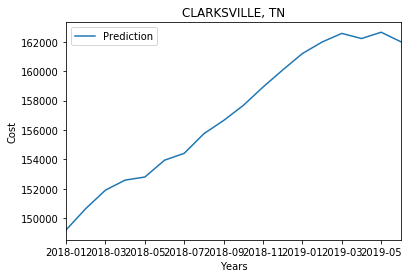

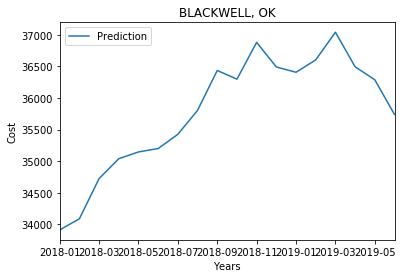

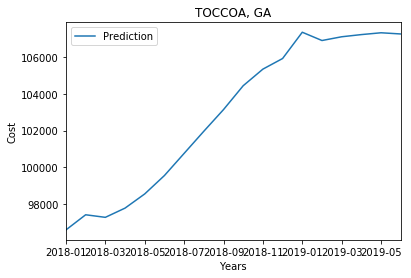

In [18]:
#training.loc[training.RegionName == z]

#ar_srcy.plot(x='variable', y='value').set(xlabel='Years', ylabel='Cost',title='Searcy, AR')
#pyplot.show()

'''
ar_analysis.loc[ar_analysis.Zip == t.index.values[0]].plot(x='Date', y='Prediction').set(xlabel='Years', ylabel='Cost',title=zipcodes.matching(str(t.index.values[0]))[0]['city'] + ', ' + zipcodes.matching(str(t.index.values[0]))[0]['state'])
pyplot.show()

ar_analysis.loc[ar_analysis.Zip == t.index.values[1]].plot(x='Date', y='Prediction').set(xlabel='Years', ylabel='Cost',title=zipcodes.matching(str(t.index.values[1]))[0]['city'] + ', ' + zipcodes.matching(str(t.index.values[1]))[0]['state'])
pyplot.show()

ar_analysis.loc[ar_analysis.Zip == t.index.values[2]].plot(x='Date', y='Prediction').set(xlabel='Years', ylabel='Cost',title=zipcodes.matching(str(t.index.values[2]))[0]['city'] + ', ' + zipcodes.matching(str(t.index.values[2]))[0]['state'])
pyplot.show()
'''
for i in [3,5,7]: #range(0,10):
    ar_analysis.loc[ar_analysis.Zip == t.iloc[i,6]].plot(x='Date', y='Prediction').set(xlabel='Years', ylabel='Cost',title=zipcodes.matching(str(t.iloc[i,6]))[0]['city'] + ', ' + zipcodes.matching(str(t.iloc[i,6]))[0]['state'])
    pyplot.show()


In [27]:
state_geo = os.path.join('us-states.json')

m = folium.Map(location=[37, -102], zoom_start=5)


m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=t,
 columns=['Zip', 'Percentage'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Unemployment Rate (%)'
)
folium.LayerControl().add_to(m)


C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [28]:
m.save('#292_folium_chloropleth_USA1.html')


In [10]:
# ignore this stuff below
zipcodes.matching('81611')[0]['city'] + ', ' + zipcodes.matching('81611')[0]['state']

'ASPEN, CO'

In [11]:
t.index.values[0]

81611

In [12]:
str(t.index.values[0])

'81611'

In [13]:
zipA['Percentage'] = zipA.Range / zipA.Prediction_y
p = zipA.sort_values(by=['Percentage'],ascending=False)
#zipA.info()
p.iloc[0:3,]

,Prediction_x,Prediction_y,Range,Percentage
Zip,,,,
83641,368404.0,241138.0,127266.0,0.527772
31217,46729.0,31575.0,15154.0,0.479937
77703,61588.0,41798.0,19790.0,0.473468


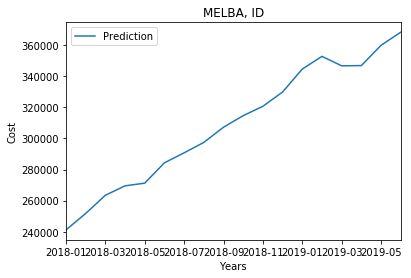

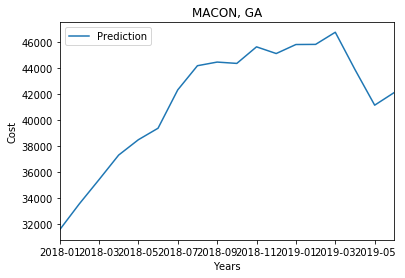

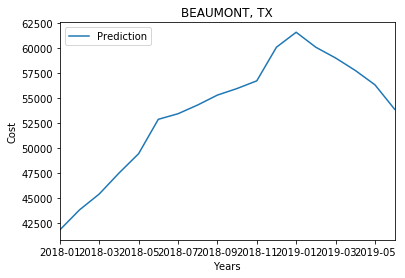

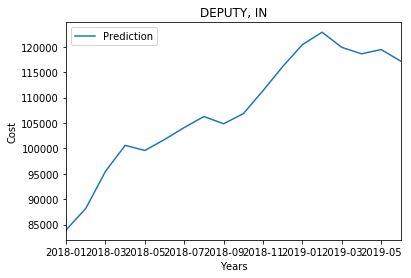

IndexError: list index out of range

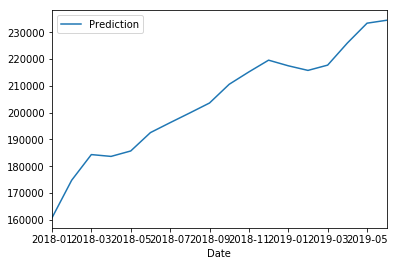

In [14]:
for i in range(0,5):
    ar_analysis.loc[ar_analysis.Zip == p.index.values[i]].plot(x='Date', y='Prediction').set(xlabel='Years', ylabel='Cost',title=zipcodes.matching(str(p.index.values[i]))[0]['city'] + ', ' + zipcodes.matching(str(p.index.values[i]))[0]['state'])
    pyplot.show()


